# 1. Entender el problema y definir el objetivo

In [ ]:
import pickle

# Variables que quieres guardar
data = {'df': df, 'model': model, 'X_train': X_train}

# Guardar en un archivo
with open('proyecto_vars.pkl', 'wb') as f:
    pickle.dump(data, f)

o	person_age: Edad del solicitante del préstamo.

o	person_income: Ingreso anual del solicitante.

o	person_home_ownership: Tipo de propiedad de vivienda (ej. alquilada, propia, hipotecada).

o	person_emp_length: Tiempo de empleo del solicitante en años.

o	loan_intent: Propósito del préstamo (ej. educación, negocio, automóvil).

o	loan_grade: Calificación del préstamo según su riesgo.

o	loan_amnt: Monto del préstamo solicitado.

o	loan_int_rate: Tasa de interés aplicada al préstamo.

o	loan_status: Estado del préstamo (0 = no incumplimiento, 1 = incumplimiento).

o	loan_percent_income: Porcentaje del ingreso anual destinado al pago del préstamo.

o	cb_person_default_on_file: Historial de incumplimiento de pagos (sí o no). Indica si el solicitante tiene un historial de incumplimiento de pagos (sí o no),

o	cb_person_cred_hist_length: Duración del historial crediticio del solicitante en años. Duración del historial crediticio en años, mayor tiempo suele asociarse con menor riesgo.


Algunos de los objetivos que podemos plantear son:

- Objetivo: Predecir la probabilidad de incumplimiento del préstamo (loan_status) Clasificacion

- Objetivo: Predecir la tasa de interés (loan_int_rate) basada en las características del cliente y el préstamo. regresion 

- Objetivo: agrupar a los solicitantes según características como ingresos, historial crediticio y porcentaje de ingresos destinado al préstamo. k means clustering






# 2. Cargar librerías y el dataset

In [1]:
#Cargar librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#nombramos a la base de datos y le pasamos la ruta de acceso
df_original = pd.read_csv("credit_risk_dataset.csv")
df_original

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
print(type(df_original))

<class 'pandas.core.frame.DataFrame'>


# 3. Explorar el dataset:

### 3.1.- Inspeccion de datos

Para esta parte es importante disponer de un experto en el tema o hacer una investigacion exhaustiva debido a que se obtendrán conclusiones de cierta informacion de los datos y no deben ser erradas

In [13]:
df_original

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
#tamaño del df
df_original.shape

(32581, 12)

In [7]:
#columnas
df_original.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [14]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [15]:
#n filas aleatorias
df_original.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3239,23,30000,MORTGAGE,6.0,HOMEIMPROVEMENT,A,6725,6.99,1,0.22,N,3
29218,36,15000,OWN,2.0,PERSONAL,C,5000,13.92,1,0.33,Y,15
10603,22,69000,MORTGAGE,4.0,EDUCATION,A,1000,7.40,0,0.01,N,2
9369,23,61440,OWN,6.0,PERSONAL,B,2500,NaN,0,0.04,N,3
13880,24,97000,MORTGAGE,2.0,HOMEIMPROVEMENT,C,12000,10.28,0,0.12,N,2
13890,23,97781,MORTGAGE,7.0,MEDICAL,A,5575,6.54,0,0.06,N,3
18423,28,84996,RENT,8.0,HOMEIMPROVEMENT,C,20000,13.92,0,0.24,N,9
2757,23,34000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,19000,11.48,0,0.56,N,4
30814,44,70000,RENT,4.0,EDUCATION,C,9500,14.22,0,0.14,N,14
1740,22,26500,RENT,3.0,DEBTCONSOLIDATION,A,1900,7.29,1,0.07,N,3


### 3.2.- Deteccion de valores nulos, duplicados y atipicos

In [3]:
#¿hay data nula?
df_original.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Solamente dos columnas tienen datos flatantes:

o	loan_int_rate: Tasa de interés aplicada al préstamo.

o	person_emp_length: Tiempo de empleo del solicitante en años.

In [19]:
#examinar duplicados
num_duplicados = df_original.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 165


Es importante deshacernos de los elementos duplicados ya que introducen sesgo al modelo de machinear aunque aquí el número de filas duplicadas es muy poco respecto a la cantidad total de datos

In [13]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


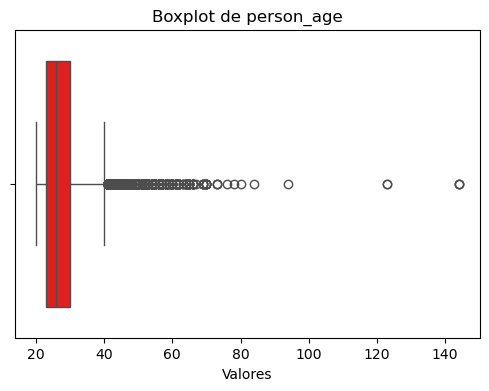

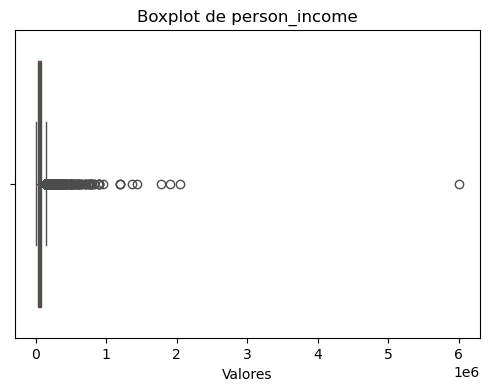

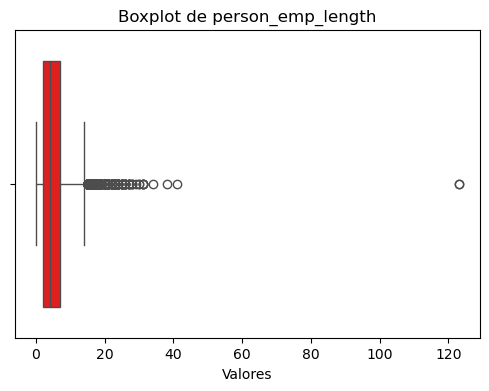

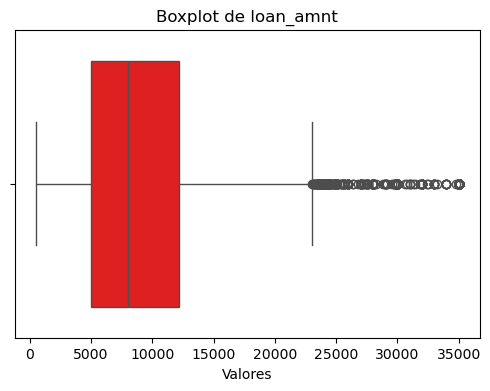

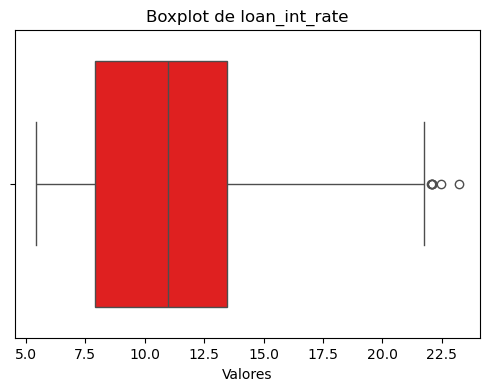

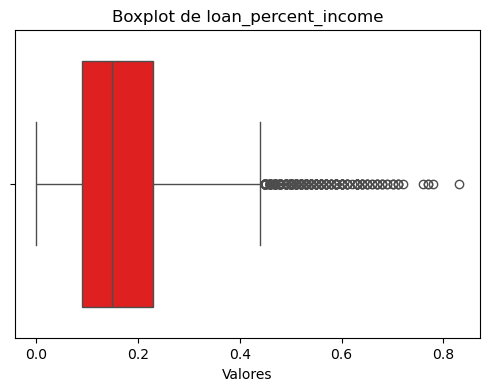

In [3]:
#para ver si hay valores atipicos (darnos una idea)
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt","loan_int_rate", "loan_percent_income"] 
# Crear gráficos
for col in columnas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_original[col], color="red")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("Valores")
    plt.show()


In [24]:
# Investigamos el porcentaje de valores atípicos en cada columna numérica
import numpy as np

columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

total_datos = 32581

for col in columnas:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Contar valores atípicos
    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)][col]
    num_outliers = outliers.count()
    porcentaje_outliers = (num_outliers / total_datos) * 100
    
    print(f"Columna: {col}, Número de valores atípicos: {num_outliers}, Porcentaje: {porcentaje_outliers:.2f}%")


Columna: person_age, Número de valores atípicos: 1494, Porcentaje: 4.59%
Columna: person_income, Número de valores atípicos: 1484, Porcentaje: 4.55%
Columna: person_emp_length, Número de valores atípicos: 853, Porcentaje: 2.62%
Columna: loan_amnt, Número de valores atípicos: 1689, Porcentaje: 5.18%
Columna: loan_int_rate, Número de valores atípicos: 6, Porcentaje: 0.02%
Columna: loan_percent_income, Número de valores atípicos: 651, Porcentaje: 2.00%


### 3.3.- Data categorica

In [17]:
#conteo de categorias
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [26]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [27]:
# Obtener las categorías (valores únicos) de cada columna
# Seleccionar solo las columnas columna1 y columna2
columnas_seleccionadas = df_original[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']]

# Obtener las categorías (valores únicos) de estas columnas
for col in columnas_seleccionadas.columns:
    print(f"Categorías en {col}: {columnas_seleccionadas[col].unique()}")


Categorías en person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Categorías en loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Categorías en loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
Categorías en cb_person_default_on_file: ['Y' 'N']


### 3.4.- analisis de datos numericos

In [4]:
df_original["person_age"].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67], dtype=int64)

In [18]:
#Estadistica descritiva univariada para el dataset
df_original.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Ahora investiguemos qué tan representativa es la media (con el coeficiente de variacion) por ejemplo de la edad de personas

In [10]:
# Calcular el coeficiente de variación para todas las columnas numéricas
cv_dict = {}

for column in df_original.select_dtypes(include=['float64', 'int64']).columns:
    mean = df_original[column].mean()
    std = df_original[column].std()
    cv = std / mean
    cv_dict[column] = cv

# Imprimir resultados
for column, cv in cv_dict.items():
    print(f"Coeficiente de variación para {column}: {cv:.4f}")

Coeficiente de variación para person_age: 0.2289
Coeficiente de variación para person_income: 0.9381
Coeficiente de variación para person_emp_length: 0.8649
Coeficiente de variación para loan_amnt: 0.6593
Coeficiente de variación para loan_int_rate: 0.2943
Coeficiente de variación para loan_status: 1.8931
Coeficiente de variación para loan_percent_income: 0.6274
Coeficiente de variación para cb_person_cred_hist_length: 0.6986


Vemos que casi todas las medias de las columnas son representativas de ellas mismas

Vemos que hay que normalizar las escalas por los intervalos diferentes en cuanto a su rango

Ahora vamos a darnos una idea sobre la distribución de las variables pero el siguiente gráfico sólo es para las variables aleatorias continuas ya que nos dará de forma visual la gráfica de la función de densidad, En caso de que alguna variable sea discreta entonces el gráfico estará incorrecto y hay que darse el tiempo de investigar el tipo de variable de cada columna para poder investigar a nivel exacto la distribución

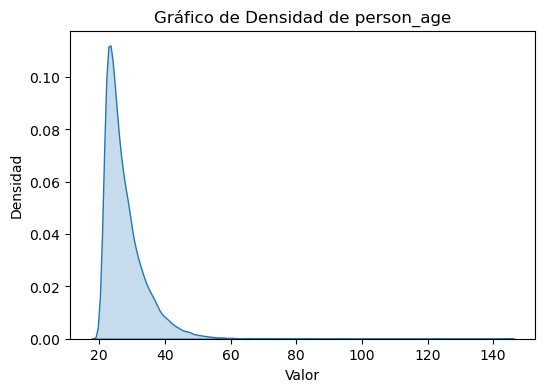

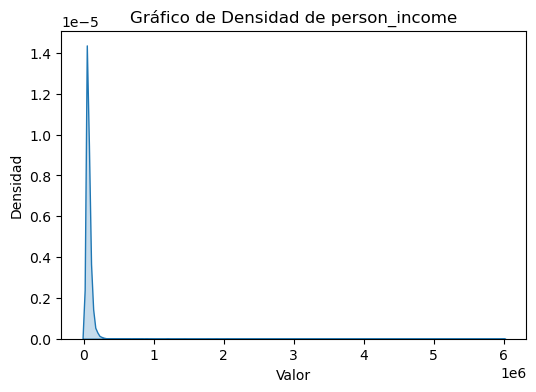

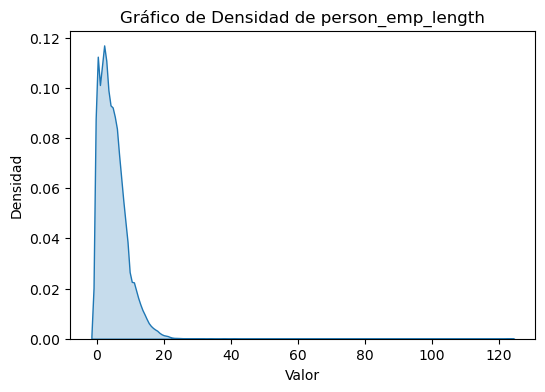

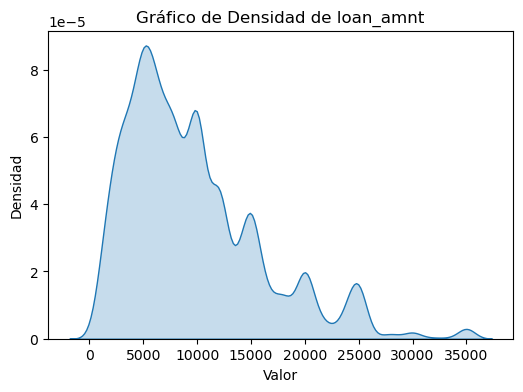

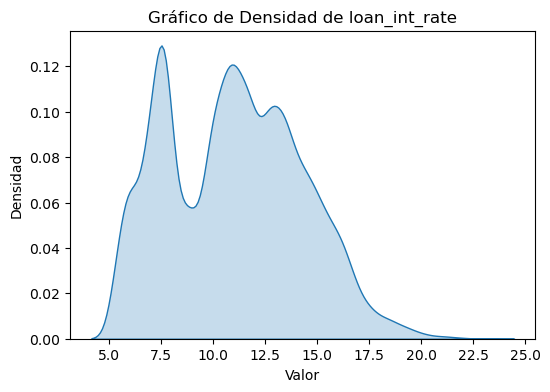

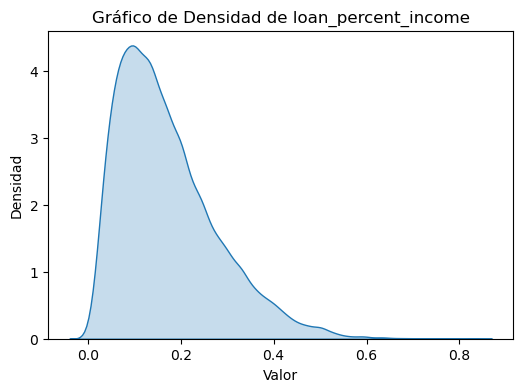

In [20]:
# Lista de columnas a graficar
columns = ["person_age", "person_income", "person_emp_length", "loan_amnt","loan_int_rate", "loan_percent_income"] 

# Crear gráficos
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_original[col], fill=True)
    plt.xlabel("Valor")
    plt.ylabel("Densidad")
    plt.title(f"Gráfico de Densidad de {col}")
    plt.show()

### 3.5.- Correlaciones y covarianza

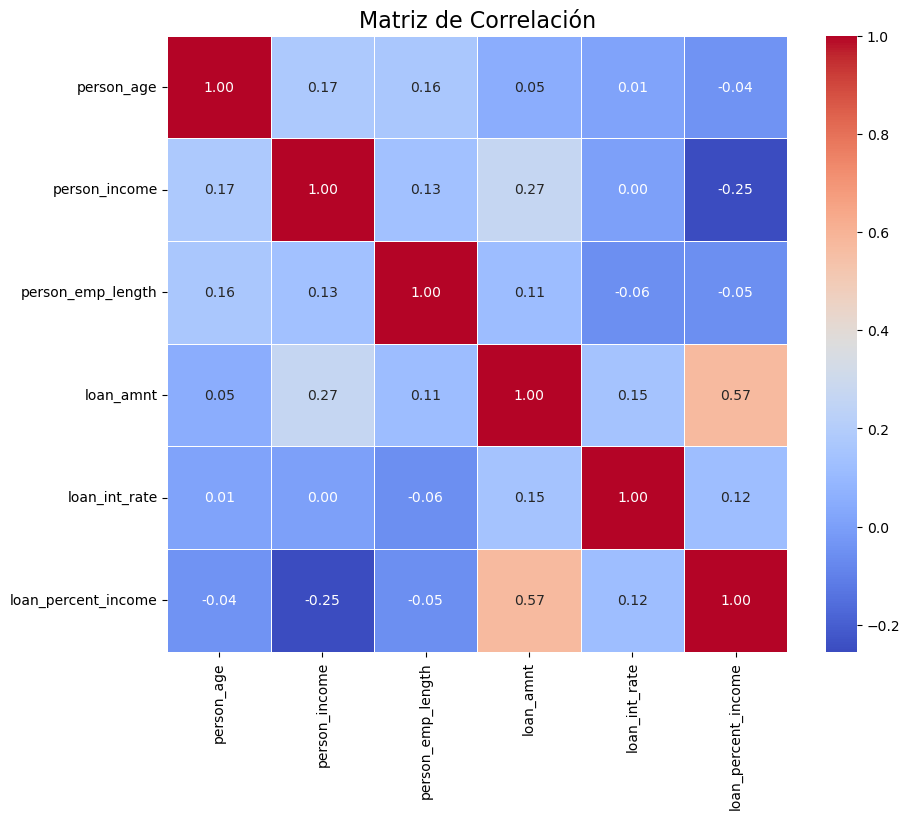

In [15]:
# Ahora investigamos la correlación entre las variables numéricas no binarias
# Seleccionar las columnas de interés
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

# Calcular la matriz de correlación
matriz_correlacion = df_original[columnas].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación', fontsize=16)
plt.show()


# 4. Preparar los datos (impiar, organizar y hacer visualizaciones)

##### CARACTERISTICAS DEL DATASET

- data nula en person_emp_length y loan_int_rate
- valores atipicos en varias columnas
- hay data categorica
- el rango de las variables es diferente
- la distribucion de las variables no es normal

### Que tipo de limpieza se debe hacer?

Dado que nuestro objetivo es  Predecir la tasa de interés (loan_int_rate) basada en las características del cliente y el préstamo, necesitamos tener la data limpia para los modelos que se implementarán.
Nesecitamos hacer la siguiente limpieza o considerarlas dadas las caracteristicas del dataset:

- 1 Estudiar los valores atipicos en las 
- 2 Estudiar la data nula e imputarla (hasta la fase de preprocesado para modelos)
- 3 Transformacion de datos categoricos con variables dummy (hasta la fase de preprocesado para modelos)
- 4 Considerar escalar variables
- 5 Ver correlaciones y evitar la multicolinealidad

In [3]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#mover variable objetivo al final
def move_column_to_end(df_original, column_name):
    col = df_original.pop(column_name)
    df_original[column_name] = col
    return df_original

df_original = move_column_to_end(df_original, 'loan_int_rate')

In [5]:
df_original

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30,13.16
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19,7.49
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28,10.99
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26,11.48


### 4.1.- Estudiar los valores atipicos 


In [4]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4,14.27


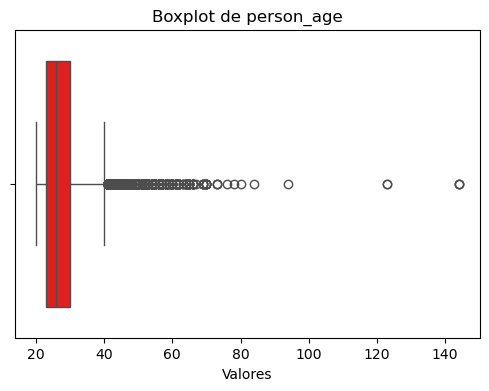

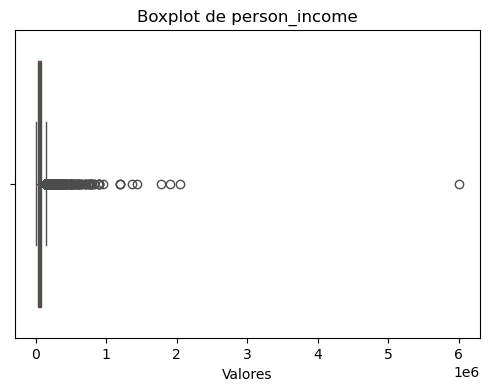

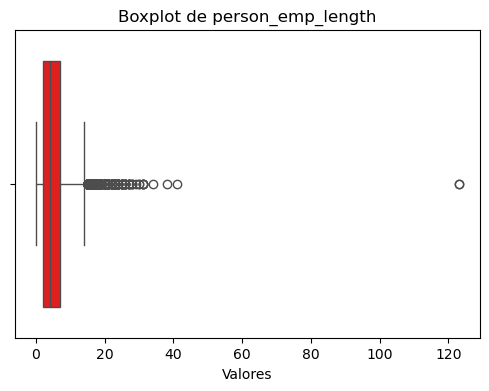

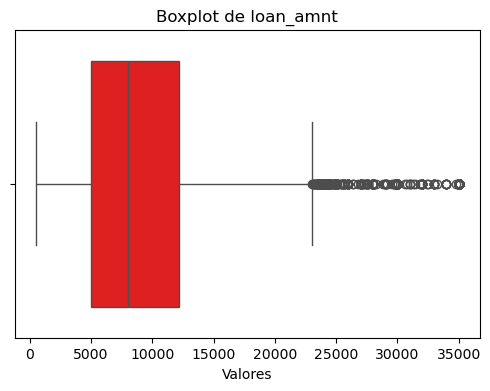

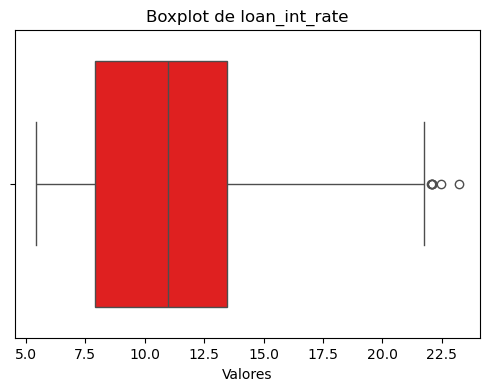

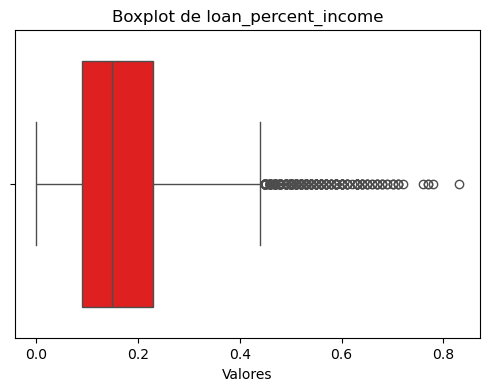

In [5]:

columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt","loan_int_rate", "loan_percent_income"] 
# Crear gráficos
for col in columnas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_original[col], color="red")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("Valores")
    plt.show()

In [5]:
# Lista de columnas a evaluar
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

# Iterar sobre cada columna para calcular el porcentaje de valores atípicos
for col in columnas:
    # Cálculo del IQR
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartílico (IQR)

    # Definir límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contabilizar los valores atípicos
    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    total_values = df_original[col].shape[0]
    percent_outliers = (num_outliers / total_values) * 100

    # Imprimir resultados
    print(f"Columna: {col}")
    print(f"Número de valores atípicos: {num_outliers}")
    print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%\n")


Columna: person_age
Número de valores atípicos: 1494
Porcentaje de valores atípicos: 4.59%

Columna: person_income
Número de valores atípicos: 1484
Porcentaje de valores atípicos: 4.55%

Columna: person_emp_length
Número de valores atípicos: 853
Porcentaje de valores atípicos: 2.62%

Columna: loan_amnt
Número de valores atípicos: 1689
Porcentaje de valores atípicos: 5.18%

Columna: loan_int_rate
Número de valores atípicos: 6
Porcentaje de valores atípicos: 0.02%

Columna: loan_percent_income
Número de valores atípicos: 651
Porcentaje de valores atípicos: 2.00%



In [4]:


# Función para imputar outliers con la mediana en una Serie
def imputar_outliers_mediana(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    mediana = serie.median()
    
    return serie.apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Supongamos que este es tu DataFrame


# Aplicar solo a columnas numéricas
for col in df_original.select_dtypes(include='number').columns:
    df_original[col] = imputar_outliers_mediana(df_original[col])

display(df_original)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22.0,59000.0,RENT,4.0,PERSONAL,D,8000.0,0.0,0.15,Y,3.0,16.02
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,0.0,0.10,N,2.0,11.14
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,0.0,0.15,N,3.0,12.87
3,23.0,65500.0,RENT,4.0,MEDICAL,C,8000.0,0.0,0.15,N,2.0,15.23
4,24.0,54400.0,RENT,8.0,MEDICAL,C,8000.0,0.0,0.15,Y,4.0,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,26.0,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,0.0,0.11,N,4.0,13.16
32577,26.0,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,0.0,0.15,N,4.0,7.49
32578,26.0,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,8000.0,0.0,0.15,N,4.0,10.99
32579,26.0,55000.0,MORTGAGE,5.0,PERSONAL,B,15000.0,0.0,0.10,N,4.0,11.48


In [5]:
#comprobamos que ya se hayan reducido los atipicos
# Lista de columnas a evaluar
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

# Iterar sobre cada columna para calcular el porcentaje de valores atípicos
for col in columnas:
    # Cálculo del IQR
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartílico (IQR)

    # Definir límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contabilizar los valores atípicos
    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    total_values = df_original[col].shape[0]
    percent_outliers = (num_outliers / total_values) * 100

    # Imprimir resultados
    print(f"Columna: {col}")
    print(f"Número de valores atípicos: {num_outliers}")
    print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%\n")

Columna: person_age
Número de valores atípicos: 573
Porcentaje de valores atípicos: 1.76%

Columna: person_income
Número de valores atípicos: 587
Porcentaje de valores atípicos: 1.80%

Columna: person_emp_length
Número de valores atípicos: 0
Porcentaje de valores atípicos: 0.00%

Columna: loan_amnt
Número de valores atípicos: 60
Porcentaje de valores atípicos: 0.18%

Columna: loan_int_rate
Número de valores atípicos: 0
Porcentaje de valores atípicos: 0.00%

Columna: loan_percent_income
Número de valores atípicos: 350
Porcentaje de valores atípicos: 1.07%



Vemos que hemos eliminado o reducido al máximo los valores atípicos con la mediana

## 4.2.-Imputacion de data nula 

In [14]:
df_original.shape

(32581, 12)

In [8]:
df_original.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_int_rate                 3116
dtype: int64

In [11]:
#Estudiamos la data nula en bmi, ¿que metodo usamos para rellenar, la quitamos?
#Calculamos el porcentaje de datos que faltan en bmi
print("el tamaño es: ", df_original.shape)
print("el total de datos son 32581 y en person_emp_length flatan 895, por lo tanto, el porcentaje de valores nulos en person_emp_length es: " , 895*100/32581, "%")
print("el total de datos son 32581 y en loan_int_rate flatan 3116, por lo tanto, el porcentaje de valores nulos en loan_int_rate es: " , 3116*100/32581, "%")

el tamaño es:  (32581, 12)
el total de datos son 32581 y en person_emp_length flatan 895, por lo tanto, el porcentaje de valores nulos en person_emp_length es:  2.7469997851508547 %
el total de datos son 32581 y en loan_int_rate flatan 3116, por lo tanto, el porcentaje de valores nulos en loan_int_rate es:  9.563856235229121 %


In [4]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4,14.27


Analizaremos la distribución de las dos variables a las cuales les vamos a imputar valores y vamos a verificar que después de la imputación no haya cambiado su distribución para no introducir sesgo en los datos. Para ello primero tenemos que entender que significa cada variable y por lo tanto qué datos contiene 


o	loan_int_rate: Tasa de interés aplicada al préstamo: Modelaremos a esta variable como una variable aleatoria continua porque se encuentra en un rango de valores donde puede tomar valores infinitos en ese rango


o	person_emp_length: Tiempo de empleo del solicitante en años: Esta variable la modelaremos como una variable aleatoria discreta ya que esta variable sus valores puede tomar sólo valores específicos no podemos representar esta variable con términos decimales por lo tanto no puede tomar valores infinitos en un rango


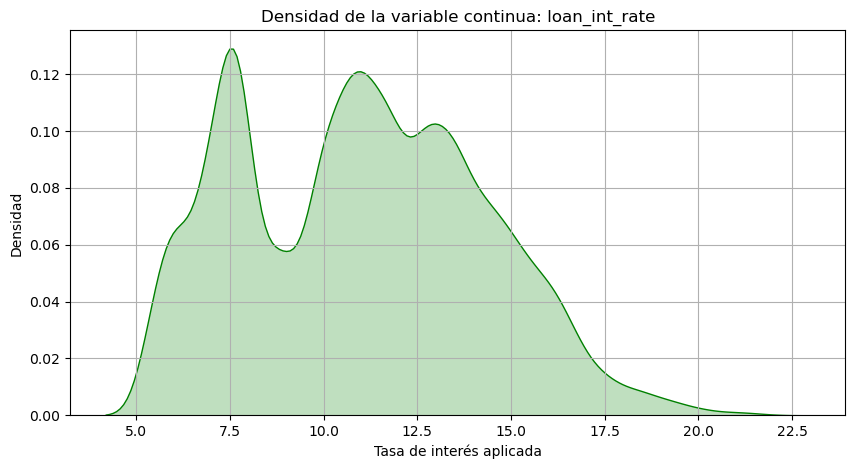

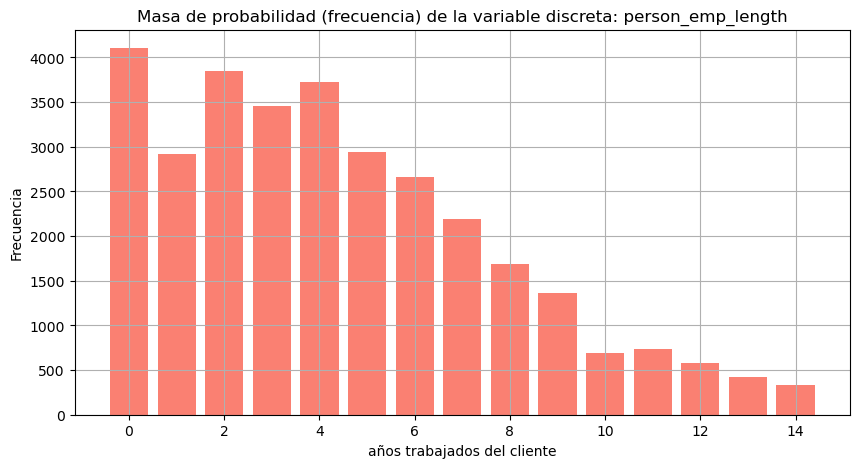

In [12]:
# ---------- VARIABLE CONTINUA ----------
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_original, x='loan_int_rate', fill=True, color='green')
plt.title('Densidad de la variable continua: loan_int_rate')
plt.xlabel('Tasa de interés aplicada')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# ---------- VARIABLE DISCRETA ----------
# Contar frecuencia de cada valor discreto (puedes limitar si hay demasiados)
discrete_counts = df_original['person_emp_length'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(discrete_counts.index, discrete_counts.values, color='salmon')
plt.title('Masa de probabilidad (frecuencia) de la variable discreta: person_emp_length')
plt.xlabel('años trabajados del cliente')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [6]:
#agregamos la media en los valores nulos de ambas columnas
df_original[["loan_int_rate", "person_emp_length"]] = df_original[["loan_int_rate", "person_emp_length"]].apply(lambda x: x.fillna(x.mean()))

In [7]:
df_original.isna().sum() #ya no hay data nula

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_int_rate                 0
dtype: int64

Ahora estudiamos la distribución tras haber sido imputada por la media

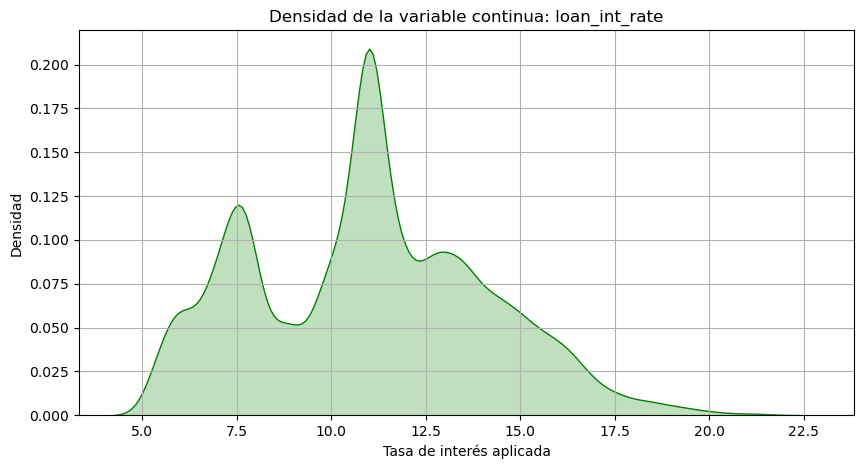

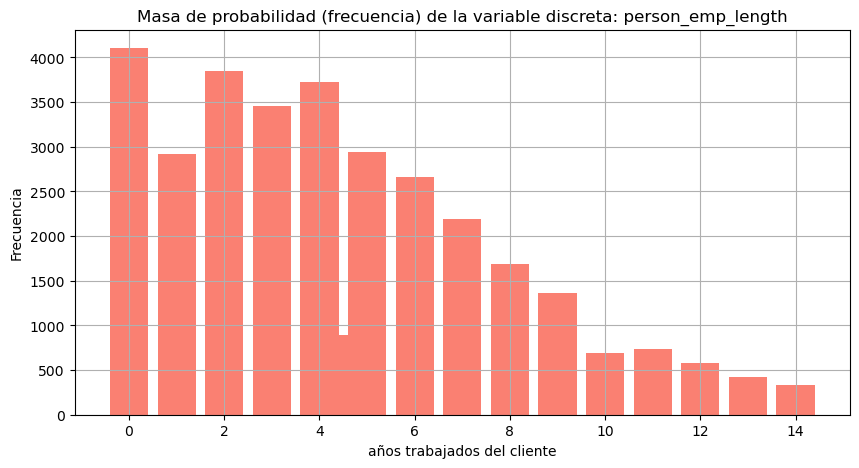

In [15]:
# ---------- VARIABLE CONTINUA ----------
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_original, x='loan_int_rate', fill=True, color='green')
plt.title('Densidad de la variable continua: loan_int_rate')
plt.xlabel('Tasa de interés aplicada')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# ---------- VARIABLE DISCRETA ----------
# Contar frecuencia de cada valor discreto (puedes limitar si hay demasiados)
discrete_counts = df_original['person_emp_length'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(discrete_counts.index, discrete_counts.values, color='salmon')
plt.title('Masa de probabilidad (frecuencia) de la variable discreta: person_emp_length')
plt.xlabel('años trabajados del cliente')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Notamos que la tasa de interés cambió su distribución significativamente aunque los años trabajados se mantuvieron relativamente igual.  Vemos que la gráfica de distribución de la tasa de interés aumentó en el punto entre 10 y 12 es decir que tiene una mayor probabilidad de tomar un valor en ese rango

Aquí podríamos investigar con mayor profundidad algún otro método para imputar la data de la variable load_int_rate, como el de knn o regresiion o algun otro. Pero por cuestiones prácticas se dejará así pero siempre conscientes de que se introdujo un poco de sesgo en la variable load_int_rate

# 5.- Visualizaciones

Esta parte se haran pocas visualizaciones porque el interes es implementar mododelos de aprendizaje automatico, Pero se pueden definir mas objetivos con la data que ya tenemos tanto limpia como sucia para extraer información valiosa como ya lo he hecho en otros proyectos. La parte de visualizaciones ya se ha hecho en powerbi con otros proyectos

In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  float64
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  float64
 7   loan_status                 32581 non-null  object 
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  float64
 11  loan_int_rate               32581 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.0+ MB


In [7]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22.0,59000.0,RENT,4.0,PERSONAL,D,8000.0,0.0,0.15,Y,3.0,16.02
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,0.0,0.10,N,2.0,11.14
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,0.0,0.15,N,3.0,12.87
3,23.0,65500.0,RENT,4.0,MEDICAL,C,8000.0,0.0,0.15,N,2.0,15.23
4,24.0,54400.0,RENT,8.0,MEDICAL,C,8000.0,0.0,0.15,Y,4.0,14.27


In [12]:
# Contabilizar las categorías de load_intent
media_tasa = df_original['loan_int_rate'].mean()
print("La media de edad es:", media_tasa)


La media de edad es: 11.009381978618704


# 6.- Modelado y evaluacion inicial

¿que modelos pueden ayudarnos a conseguir nuestro objetivo?

Recordemos que nuestros objetivos son:

"""- Objetivo: Predecir la probabilidad de incumplimiento del préstamo (loan_status) Clasificacion"""

- Objetivo: Predecir la tasa de interés (loan_int_rate) basada en las características del cliente y el préstamo. regresion

              - Regresion lineal multiple

              - SVR

              - Bosques aleatorios

"""- Objetivo: agrupar a los solicitantes según características como ingresos, historial crediticio y porcentaje de ingresos destinado al préstamo. k means clusterin"""



## 6.0.- Preprocesamos los datos para los modelos

codificamos variables categoricas

In [8]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22.0,59000.0,RENT,4.0,PERSONAL,D,8000.0,0.0,0.15,Y,3.0,16.02
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,0.0,0.10,N,2.0,11.14
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,0.0,0.15,N,3.0,12.87
3,23.0,65500.0,RENT,4.0,MEDICAL,C,8000.0,0.0,0.15,N,2.0,15.23
4,24.0,54400.0,RENT,8.0,MEDICAL,C,8000.0,0.0,0.15,Y,4.0,14.27


las variables que deben ser codificadas son:

- person_home_ownership
  
- loan_intent
  
- loan_grade

- cb_person_default_on_file

In [9]:
lista = ["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]
for i in lista:
    num_categorias = df_original[i].nunique()
    print(f'Este es el numero de categorias: {num_categorias}, en la columna {i}') 

Este es el numero de categorias: 4, en la columna person_home_ownership
Este es el numero de categorias: 6, en la columna loan_intent
Este es el numero de categorias: 7, en la columna loan_grade
Este es el numero de categorias: 2, en la columna cb_person_default_on_file


Como las variables dummy generan k-1 columnas o variables nuevas para k el numero de categorias en cada columna:

- person_home_ownership generara 3 columnas nuevas

- loan_intent 5

- loan_grade 6

- cb_person_default_on_file 1


15 nuevas dummy + las que ya estaban 8

In [10]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  float64
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  float64
 7   loan_status                 32581 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  float64
 11  loan_int_rate               32581 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.0+ MB


In [7]:
lista = ["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]
df_dummies = pd.get_dummies(df_original[lista], drop_first=True, dtype=int)

In [12]:
df_dummies.shape

(32581, 15)

In [8]:
# Unir las columnas dummy con el DataFrame original
df_final = pd.concat([df_original, df_dummies], axis=1)

# Eliminar las columnas categóricas originales 
df_final = df_final.drop(["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"], axis=1)

In [9]:
df_final = pd.DataFrame(df_final)

In [10]:
#mover variable objetivo al final
def move_column_to_end(df_final, column_name):
    col = df_final.pop(column_name)
    df_final[column_name] = col
    return df_final

df_final = move_column_to_end(df_final, 'loan_int_rate')

In [16]:
df_final.shape

(32581, 23)

In [20]:
# Verificar los tipos de datos de cada columna en df_final
print(df_final.dtypes)

person_age                     float64
person_income                  float64
person_emp_length              float64
loan_amnt                      float64
loan_status                     object
loan_percent_income            float64
cb_person_cred_hist_length     float64
person_home_ownership_OTHER      int32
person_home_ownership_OWN        int32
person_home_ownership_RENT       int32
loan_intent_EDUCATION            int32
loan_intent_HOMEIMPROVEMENT      int32
loan_intent_MEDICAL              int32
loan_intent_PERSONAL             int32
loan_intent_VENTURE              int32
loan_grade_B                     int32
loan_grade_C                     int32
loan_grade_D                     int32
loan_grade_E                     int32
loan_grade_F                     int32
loan_grade_G                     int32
cb_person_default_on_file_Y      int32
loan_int_rate                  float64
dtype: object


In [21]:
#observamos los rangos en los uqe se encuentran las variables
df_final.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_int_rate
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,26.775728,58536.244191,4.418797,8630.078880,0.163014,5.302692,0.003284,0.079310,0.504773,0.198060,...,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.176330,11.009382
std,4.429075,26896.111063,3.351115,4869.458315,0.094772,3.216292,0.057214,0.270226,0.499985,0.398544,...,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106,3.077756
min,20.000000,4000.000000,0.000000,500.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.420000
25%,23.000000,38500.000000,2.000000,5000.000000,0.090000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.490000
50%,26.000000,55000.000000,4.000000,8000.000000,0.150000,4.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.009382
75%,29.000000,74000.000000,6.000000,12000.000000,0.220000,7.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.110000
max,40.000000,140004.000000,14.000000,23000.000000,0.440000,15.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.740000


In [19]:
df_final.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_int_rate
0,22.0,59000.0,4.0,8000.0,0.0,0.15,3.0,0,0,1,...,1,0,0,0,1,0,0,0,1,16.02
1,21.0,9600.0,5.0,1000.0,0.0,0.10,2.0,0,1,0,...,0,0,1,0,0,0,0,0,0,11.14
2,25.0,9600.0,1.0,5500.0,0.0,0.15,3.0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.87
3,23.0,65500.0,4.0,8000.0,0.0,0.15,2.0,0,0,1,...,0,0,0,1,0,0,0,0,0,15.23
4,24.0,54400.0,8.0,8000.0,0.0,0.15,4.0,0,0,1,...,0,0,0,1,0,0,0,0,1,14.27


In [20]:
df_final.shape

(32581, 23)

In [13]:
#Definimos las variables
X = df_final.iloc[:, :-1] 
y = df_final.iloc[:, -1]

In [12]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22.0,59000.0,4.0,8000.0,0.0,0.15,3.0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,21.0,9600.0,5.0,1000.0,0.0,0.10,2.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,25.0,9600.0,1.0,5500.0,0.0,0.15,3.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23.0,65500.0,4.0,8000.0,0.0,0.15,2.0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,24.0,54400.0,8.0,8000.0,0.0,0.15,4.0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,26.0,53000.0,1.0,5800.0,0.0,0.11,4.0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
32577,26.0,120000.0,4.0,17625.0,0.0,0.15,4.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32578,26.0,76000.0,3.0,8000.0,0.0,0.15,4.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
32579,26.0,55000.0,5.0,15000.0,0.0,0.10,4.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [20]:
X.shape

(32581, 22)

In [21]:
y

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [22]:
y.shape

(32581,)

In [23]:
X.values

array([[2.2e+01, 5.9e+04, 4.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       [2.1e+01, 9.6e+03, 5.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.5e+01, 9.6e+03, 1.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [2.6e+01, 7.6e+04, 3.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.6e+01, 5.5e+04, 5.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.6e+01, 4.2e+04, 2.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00]])

In [24]:
y.values

array([16.02, 11.14, 12.87, ..., 10.99, 11.48,  9.99])

In [14]:
#dividimos el conjunto de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [26]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
12657,25.0,66300.0,9.0,1700.0,0.0,0.02,4.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11611,22.0,75000.0,6.0,8000.0,0.0,0.33,2.0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
18223,31.0,105400.0,2.0,8000.0,0.0,0.20,5.0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
24772,35.0,75000.0,5.0,5000.0,0.0,0.07,9.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
30770,36.0,65000.0,6.0,8000.0,0.0,0.36,14.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39.0,38500.0,7.0,3500.0,0.0,0.09,4.0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5390,25.0,69000.0,5.0,8500.0,0.0,0.12,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
860,26.0,55000.0,1.0,20000.0,0.0,0.14,3.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
15795,26.0,55000.0,0.0,15000.0,0.0,0.09,3.0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [27]:
X_test

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
14668,24.0,28000.0,6.0,10000.0,0.0,0.36,2.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
24614,27.0,64000.0,0.0,10000.0,0.0,0.16,10.0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
11096,26.0,72000.0,10.0,16000.0,0.0,0.22,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10424,23.0,27996.0,7.0,10000.0,0.0,0.36,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26007,30.0,44500.0,2.0,13000.0,0.0,0.29,6.0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,38.0,70000.0,2.0,5000.0,0.0,0.07,11.0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
27898,27.0,55000.0,2.0,18000.0,0.0,0.12,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22854,33.0,19200.0,0.0,8000.0,0.0,0.42,6.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
20557,29.0,96500.0,13.0,10000.0,0.0,0.10,8.0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [26]:
y_train

12657     6.760000
11611     9.250000
18223    15.310000
24772     8.700000
30770    15.270000
           ...    
29802    13.980000
5390      6.920000
860      17.990000
15795    11.009382
23654     7.490000
Name: loan_int_rate, Length: 22806, dtype: float64

In [27]:
y_test

14668    10.370000
24614    15.270000
11096    11.009382
10424    11.009382
26007    16.320000
           ...    
30077    12.420000
27898    11.009382
22854     7.660000
20557     8.880000
27481    15.330000
Name: loan_int_rate, Length: 9775, dtype: float64

Ya que utilizaremos regresores para este objetivo nos conviene escalar los datos

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
X_train

array([[-0.42952521,  0.00340048,  1.0397277 , ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.8970508 ,  0.13744177,  0.30245154, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [ 0.50552597,  0.60581591, -0.68058332, ..., -0.08405513,
        -0.04495653, -0.46168131],
       ...,
       [-0.27368335,  1.262156  , -0.92634204, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.27368335,  1.6781462 , -1.17210076, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.11784149, -0.01662867,  1.53124513, ..., -0.08405513,
        -0.04495653, -0.46168131]])

In [28]:
X_test

array([[-0.58536707, -0.58668931,  0.30245154, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.11784149, -0.03203572, -1.17210076, ..., -0.08405513,
        -0.04495653,  2.16599626],
       [-0.27368335,  0.09122064,  1.28548641, ..., -0.08405513,
        -0.04495653, -0.46168131],
       ...,
       [ 0.81720969, -0.7222713 , -1.17210076, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [ 0.19384224,  0.46869322,  2.02276256, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [ 0.3496841 ,  0.69093983, -0.92634204, ..., -0.08405513,
        -0.04495653, -0.46168131]])

## 6.1.-  Entrenar los modelos elegidos

Ahora nos concentraremos en aplicar regresores para el primer objetivo del proyecto

### Regresion lineal multiple

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regression.predict(X_test)
y_pred

array([10.9577667 , 13.33529449, 14.91372045, ...,  7.8068414 ,
       11.05074706, 15.04758808])

### SVR

In [17]:
from sklearn.svm import SVR
regression2 = SVR(kernel = "rbf")#rbf es el valor del kernel por defecto, que es el kernel gaussiano
regression2.fit(X_train, y_train)

SVR()

In [18]:
y_pred2 = regression2.predict(X_test)
y_pred2

array([10.99372852, 13.09745278, 15.37951788, ...,  8.13074857,
       10.82103726, 15.31852968])


### Arbol de decision

In [16]:
from sklearn.tree import DecisionTreeRegressor
regression3 = DecisionTreeRegressor(random_state = 0)
regression3.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [17]:
y_pred3 = regression3.predict(X_test)
y_pred3

array([ 9.91, 12.41, 15.62, ...,  6.62,  9.99, 15.33])

### Evaluacion inicial de modelos sin procesar

Qué métricas podemos utilizar para evaluar el modelo o modelos.

Utilizaremos la raíz cuadrada del error cuadrático medio ya que nos permite interpretar de mejor manera el error porque las unidades son igual que las originales caso contrario de error cuadrático medio que deja las unidades al cuadrado

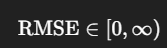

In [21]:
# Calcular la raíz del error cuadrático medio (RMSE)

from sklearn.metrics import mean_squared_error
import numpy as np

modelos = [regression, regression2, regression3]
predicciones = [y_pred, y_pred2, y_pred3]

for i, (modelo, pred) in enumerate(zip(modelos, predicciones), start=1):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(f"{modelo} - Raíz del error cuadrático medio (RMSE): {rmse:.4f}")



LinearRegression() - Raíz del error cuadrático medio (RMSE): 1.3120
SVR() - Raíz del error cuadrático medio (RMSE): 1.3284
DecisionTreeRegressor(random_state=0) - Raíz del error cuadrático medio (RMSE): 1.8453


Observamos que en general y en principio las predicciones hechas por los 3 modelos son casi equivalentes y son buenas predicciones habría que investigar el sobre ajuste

# 7.- Optimizar los modelos 

Algún modelo está sobreajustado?

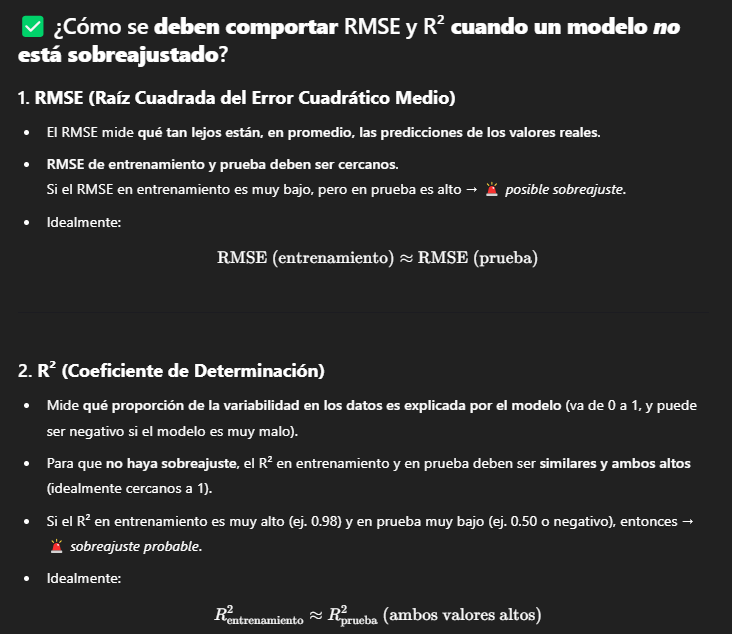
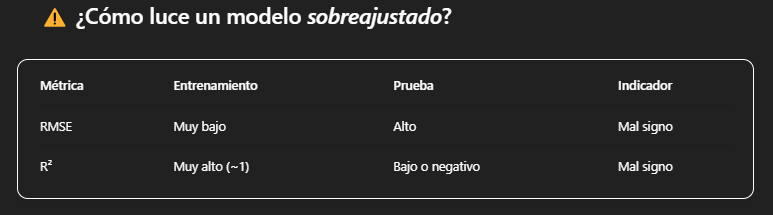


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

modelos = [regression, regression2, regression3]
nombres = ["Regresion lineal multiple", "SVR", "Bosques aleatorios"]

for i, (modelo, nombre) in enumerate(zip(modelos, nombres), start=1):
    # Predicciones para entrenamiento y prueba
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # MSE y RMSE para entrenamiento
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)

    # MSE y RMSE para prueba
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    # Imprimir resultados
    print(f"\n{nombre}:")
    print(f"  RMSE entrenamiento: {rmse_train:.4f}")
    print(f"  RMSE prueba:        {rmse_test:.4f}")

    # Evaluación del posible sobreajuste
    if rmse_test > rmse_train * 1.5:
        print("  ⚠️ Posible sobreajuste detectado.")
    else:
        print("  ✅ Sin señales claras de sobreajuste.")



Regresion lineal multiple:
  RMSE entrenamiento: 1.3073
  RMSE prueba:        1.3120
  ✅ Sin señales claras de sobreajuste.

SVR:
  RMSE entrenamiento: 1.2833
  RMSE prueba:        1.3284
  ✅ Sin señales claras de sobreajuste.

Bosques aleatorios:
  RMSE entrenamiento: 0.0272
  RMSE prueba:        1.8453
  ⚠️ Posible sobreajuste detectado.


In [23]:
from sklearn.metrics import r2_score

modelos = [regression, regression2, regression3]
nombres = ["Regresión lineal múltiple", "SVR", "Bosques aleatorios"]

for i, (modelo, nombre) in enumerate(zip(modelos, nombres), start=1):
    # Predicciones para entrenamiento y prueba
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # R² para entrenamiento y prueba
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Imprimir resultados
    print(f"\n{nombre}:")
    print(f"  R² entrenamiento: {r2_train:.4f}")
    print(f"  R² prueba:        {r2_test:.4f}")

    # Evaluación del posible sobreajuste
    if r2_train - r2_test > 0.15:
        print("  ⚠️ Posible sobreajuste detectado.")
    else:
        print("  ✅ Sin señales claras de sobreajuste.")




Regresión lineal múltiple:
  R² entrenamiento: 0.8184
  R² prueba:        0.8210
  ✅ Sin señales claras de sobreajuste.

SVR:
  R² entrenamiento: 0.8250
  R² prueba:        0.8165
  ✅ Sin señales claras de sobreajuste.

Bosques aleatorios:
  R² entrenamiento: 0.9999
  R² prueba:        0.6459
  ⚠️ Posible sobreajuste detectado.


Observamos que tenemos un posible sobre ajuste en el algoritmo de arboles de decision Ya que ambas métricas arrojaron resultados similares correspondiente



Para tener una métrica más robusta del rendimiento de cada 1 de los modelos vamos a utilizar validación cruzada para cada modelo

### 7.1.- Optimizacion  de bosques aleatorios

Sabemos que nuestro problema con los bosques aleatorios es que está sobreajustado

Entonces podemos utilizar  :

- hacer una seleccion de caractersiticas 
- reducir la dimension con PCA
- Aplicar regularizacion con seleccion de caracteristicas  (lasso L1)  (no es apropiado para modelos no lineales) o aplicar la eliminacion hacia atras a partir del p valor
- Estudiar en profundidad los parametros e hiperparametros del bosque aleatorio
- coss validation



Entonces estudiaremos el ajuste de hiperparámetros mediante la validación cruzada

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Crear el modelo base
regression3 = RandomForestRegressor(random_state=42)

# 2. Rejilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# 3. GridSearchCV con validación cruzada
grid_search = GridSearchCV(estimator=regression3,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

# 4. Ajustar el modelo
grid_search.fit(X_train, y_train)

# 5. Resultados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

print("\nMejor puntuación (MSE negativo) en validación cruzada:")
print(grid_search.best_score_)

# 6. Evaluar en el set de prueba
best_model = grid_search.best_estimator_
y_pred3 = best_model.predict(X_test)

print("\nEvaluación en el conjunto de prueba:")
print(f"R2: {r2_score(y_test, y_pred3):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred3, squared=False):.4f}")



Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores hiperparámetros:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Mejor puntuación (MSE negativo) en validación cruzada:
-1.7553188761706209

Evaluación en el conjunto de prueba:
R2: 0.8174
RMSE: 1.3253


C:\Users\Fernando\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 8.- Obtencion de resultados

En esta parte podríamos utilizar otros software como powerbi donde podríamos extraer información muy específica de visualizaciones concretas que queramos hacer para obtener resultados e incluso hacer un reporte más denso en powerbi u otro software que se sepa manejar. 
Els que tenemos 3 modelos entrenados donde dos de ellos son relativamente buenos y el último que es el de árboles de decisión requiere un análisis más profundo con un equipo completo para analizar los parámetros y buscar con diversas técnicas o métodos mejores parámetros y en general optimizarlo.